# Setup

In [43]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

In [17]:
# Set global variables

path_csv_path = 'logs/path.csv'
tracker_csv_path = 'logs/tracker.csv'

In [18]:
# Read the path and tracker files into Pandas DataFrames

path_df = pd.read_csv(path_csv_path)
tracker_df = pd.read_csv(tracker_csv_path)

# Data Analysis

In [19]:
# Take a little look at the data in the DataFrames
# path_df.head(25)
tracker_df.head(25)

,Unnamed: 0,index,x_trk,y_trk,z_trk,t_trk
0,0,3180,-36.507133,-40.170982,-2915.784424,1633969004633871000
1,1,3181,-36.543438,-40.260765,-2915.713623,1633969004648860000
2,2,3182,-36.645119,-40.364326,-2915.732910,1633969004662330000
3,3,3183,-36.709301,-40.413754,-2915.772949,1633969004674115000
4,4,3184,-36.720108,-40.421989,-2915.788086,1633969004687849000
5,5,3185,-36.724915,-40.427578,-2915.725586,1633969004699959000
6,6,3186,-36.668312,-40.436436,-2915.676758,1633969004713613000
7,7,3187,-36.652710,-40.457592,-2915.729492,1633969004730045000
8,8,3188,-36.705055,-40.492893,-2915.809814,1633969004741991000
9,9,3189,-36.777580,-40.530525,-2915.860596,1633969004754114000


## 1. "z" dimension

### 1.1. It seems that the "z" dimension of path_df has a lot of values at or very near to 0. Let's check that out.

array([[<AxesSubplot:title={'center':'z_pth'}>]], dtype=object)

<Figure size 432x288 with 0 Axes>

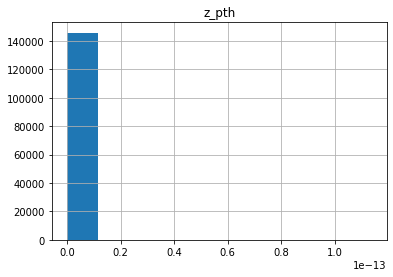

In [20]:
## QUALITATIVE ANALYSIS ##

# First, let's plot a histogram of the 'z_pth' values in path_df
plt.figure()
path_df.hist(column='z_pth')

In [21]:
## QUANTITATIVE ANALYSIS ##

# Get statistics on z_pth column
z_pth_mean = path_df['z_pth'].mean()
z_pth_std = path_df['z_pth'].std()

print(f"The 'z_pth' column has a mean of {z_pth_mean} and an std of {z_pth_std}")

The 'z_pth' column has a mean of 7.795259064434285e-19 and an std of 2.976941975007739e-16


### With a mean very close to 0 and a standard deviation very close to zero, we will disregard the z_pth dimension of path_df

### 1.2. Let's check out the "z" dimension of tracker_df as well

array([[<AxesSubplot:title={'center':'z_trk'}>]], dtype=object)

<Figure size 432x288 with 0 Axes>

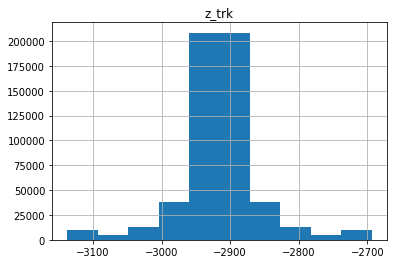

In [22]:
## QUALITATIVE ANALYSIS ##

# First, let's plot a histogram of the 'z_trk' values in tracker_df
plt.figure()
tracker_df.hist(column='z_trk')

In [23]:
## QUANTITATIVE ANALYSIS ##

# Get statistics on z_trk column
z_trk_mean = tracker_df['z_trk'].mean()
z_trk_std = tracker_df['z_trk'].std()

print(f"The 'z_trk' column has a mean of {z_trk_mean} and an std of {z_trk_std}")

The 'z_trk' column has a mean of -2915.682661820343 and an std of 57.930370443016606


#### This one seems more tricky. I want to see if there are any correlations between the z_trk column and other columns

<AxesSubplot:title={'center':'z_trk and index'}, xlabel='z_trk', ylabel='index'>

<Figure size 432x288 with 0 Axes>

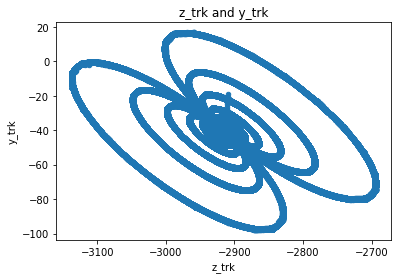

<Figure size 432x288 with 0 Axes>

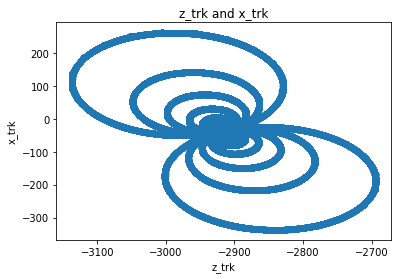

<Figure size 432x288 with 0 Axes>

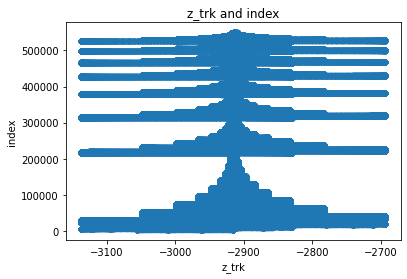

In [24]:
# Create scatterplots to find correlation between 'z_trk' and other columns

plt.figure()
tracker_df.plot(kind='scatter', x='z_trk', y='y_trk', title='z_trk and y_trk')

plt.figure()
tracker_df.plot(kind='scatter', x='z_trk', y='x_trk', title='z_trk and x_trk')

plt.figure()
tracker_df.plot(kind='scatter', x='z_trk', y='index', title='z_trk and index')

<AxesSubplot:title={'center':'x_trk and z_trk'}, xlabel='x_trk', ylabel='z_trk'>

<Figure size 432x288 with 0 Axes>

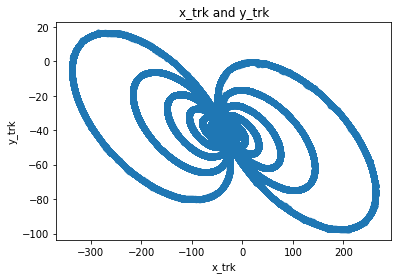

<Figure size 432x288 with 0 Axes>

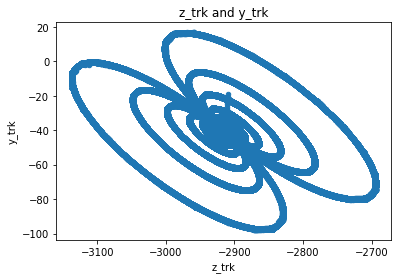

<Figure size 432x288 with 0 Axes>

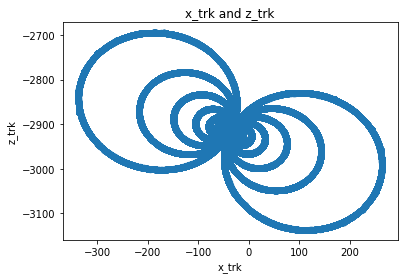

In [25]:
plt.figure()
tracker_df.plot(kind='scatter', x='x_trk', y='y_trk', title='x_trk and y_trk')

plt.figure()
tracker_df.plot(kind='scatter', x='z_trk', y='y_trk', title='z_trk and y_trk')

plt.figure()
tracker_df.plot(kind='scatter', x='x_trk', y='z_trk', title='x_trk and z_trk')


# Data Cleaning

## 1. Remove unnecessary data

In [26]:
# Remove the "time" and "Unnamed: 0" dimension in path_df and the "Unnamed: 0" and "time" dimension in tracker_df
path_df.drop(columns=['t_pth', 'Unnamed: 0'], inplace=True)
tracker_df.drop(columns=['t_trk', 'Unnamed: 0'], inplace=True)
path_df.head()

,index,x_pth,y_pth,z_pth
0,177,450.0,700.0,1.136868e-13
1,178,450.0,700.0,0.000000e+00
2,179,450.0,700.0,0.000000e+00
3,180,450.0,700.0,0.000000e+00
4,181,450.0,700.0,0.000000e+00


## 2. Concatenate the two dataframes together

In [27]:
# We'll use an inner join to disregard all of the indices listed in path_df but not in tracker_df

merged_df = path_df.merge(tracker_df, how='inner', on='index', suffixes=('_path', '_tracker'))
merged_df.head()

,index,x_pth,y_pth,z_pth,x_trk,y_trk,z_trk
0,3180,601.989607,810.426914,0.0,-36.507133,-40.170982,-2915.784424
1,3181,601.989607,810.426914,0.0,-36.543438,-40.260765,-2915.713623
2,3182,601.989607,810.426914,0.0,-36.645119,-40.364326,-2915.732910
3,3183,601.989607,810.426914,0.0,-36.709301,-40.413754,-2915.772949
4,3184,601.989607,810.426914,0.0,-36.720108,-40.421989,-2915.788086


## 3. Create derived columns

In [33]:
# Make new columns representing the difference between _trk and _pth columns

merged_df['x_dif'] = merged_df['x_pth'] - merged_df['x_trk']
merged_df['y_dif'] = merged_df['y_pth'] - merged_df['y_trk']
merged_df['z_dif'] = merged_df['z_pth'] - merged_df['z_trk']

## 4. Find correlations amongst columns

<AxesSubplot:title={'center':'x_pth and z_trk'}, xlabel='x_pth', ylabel='z_trk'>

<Figure size 432x288 with 0 Axes>

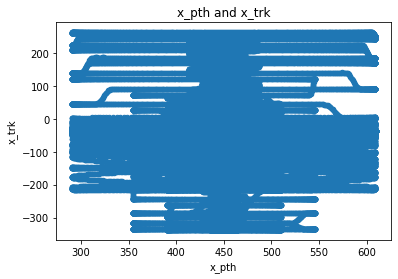

<Figure size 432x288 with 0 Axes>

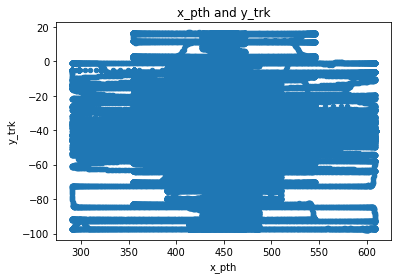

<Figure size 432x288 with 0 Axes>

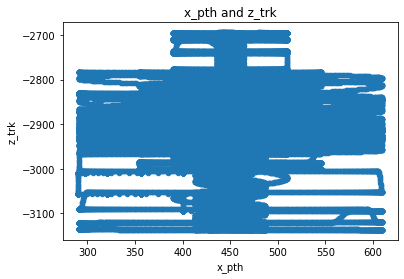

In [28]:
# Correlations from x_pth to other columns

plt.figure()
merged_df.plot(kind='scatter', x='x_pth', y='x_trk', title='x_pth and x_trk')

plt.figure()
merged_df.plot(kind='scatter', x='x_pth', y='y_trk', title='x_pth and y_trk')

plt.figure()
merged_df.plot(kind='scatter', x='x_pth', y='z_trk', title='x_pth and z_trk')

No notable correlations, which makes sense for y_trk and z_trk, but not x_trk! x_pth and x_trk should be very strongly correlated in ideal conditions.

<AxesSubplot:title={'center':'x_pth and z_trk'}, xlabel='y_pth', ylabel='z_trk'>

<Figure size 432x288 with 0 Axes>

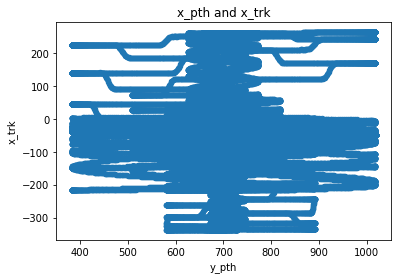

<Figure size 432x288 with 0 Axes>

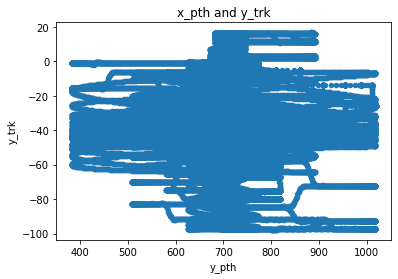

<Figure size 432x288 with 0 Axes>

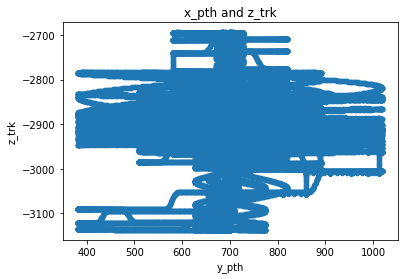

In [29]:
# Correlations from y_pth to other columns

plt.figure()
merged_df.plot(kind='scatter', x='y_pth', y='x_trk', title='x_pth and x_trk')

plt.figure()
merged_df.plot(kind='scatter', x='y_pth', y='y_trk', title='x_pth and y_trk')

plt.figure()
merged_df.plot(kind='scatter', x='y_pth', y='z_trk', title='x_pth and z_trk')

Again, no notable correlations, which makes sense for x_trk and z_trk, but not y_trk! y_pth and y_trk should be very strongly correlated in ideal conditions. Also, if there is a function transforming the input coordinates to output actuation, that functions *seems* to be highly nonlinear

<AxesSubplot:title={'center':'x_dif and z_trk'}, xlabel='x_dif', ylabel='z_trk'>

<Figure size 432x288 with 0 Axes>

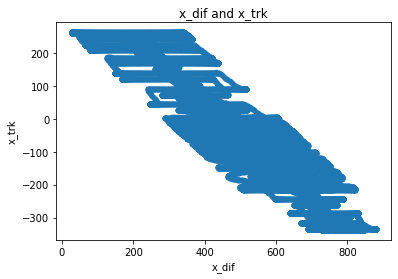

<Figure size 432x288 with 0 Axes>

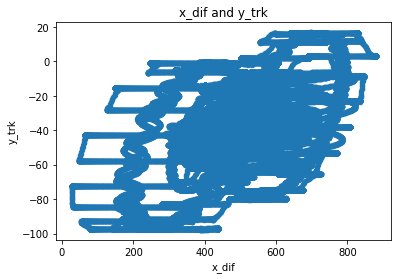

<Figure size 432x288 with 0 Axes>

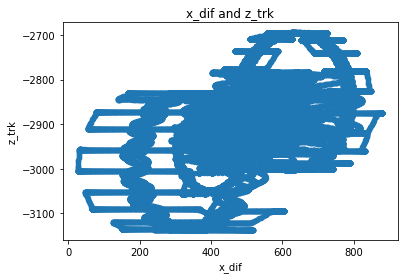

In [35]:
# Correlations from x_dif to other columns in tracker DataFrame

plt.figure()
merged_df.plot(kind='scatter', x='x_dif', y='x_trk', title='x_dif and x_trk')

plt.figure()
merged_df.plot(kind='scatter', x='x_dif', y='y_trk', title='x_dif and y_trk')

plt.figure()
merged_df.plot(kind='scatter', x='x_dif', y='z_trk', title='x_dif and z_trk')

<AxesSubplot:title={'center':'x_dif and z_pth'}, xlabel='x_dif', ylabel='z_pth'>

<Figure size 432x288 with 0 Axes>

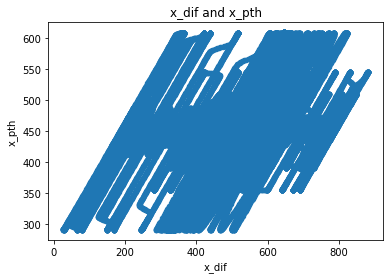

<Figure size 432x288 with 0 Axes>

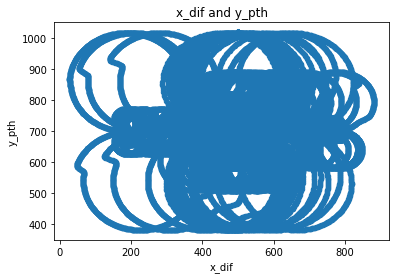

<Figure size 432x288 with 0 Axes>

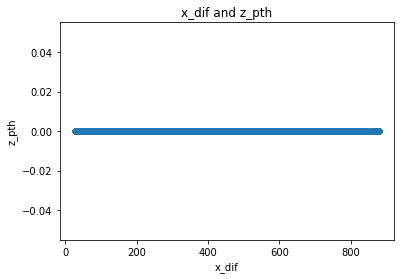

In [36]:
# Correlations from x_dif to other columns in path DataFrame

plt.figure()
merged_df.plot(kind='scatter', x='x_dif', y='x_pth', title='x_dif and x_pth')

plt.figure()
merged_df.plot(kind='scatter', x='x_dif', y='y_pth', title='x_dif and y_pth')

plt.figure()
merged_df.plot(kind='scatter', x='x_dif', y='z_pth', title='x_dif and z_pth')

Let's try to plot things in 3D.

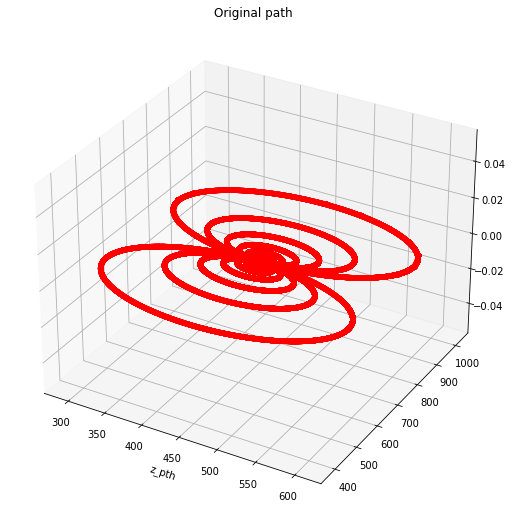

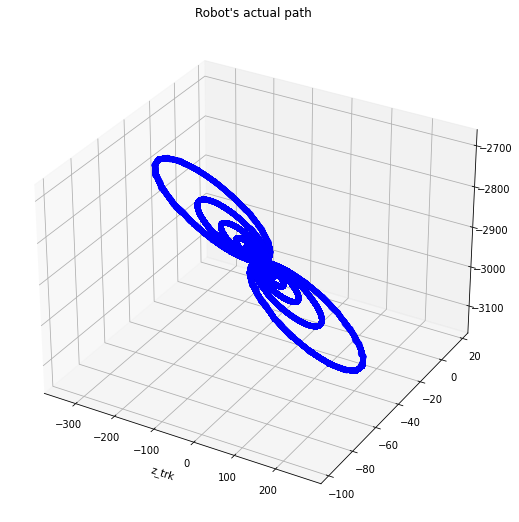

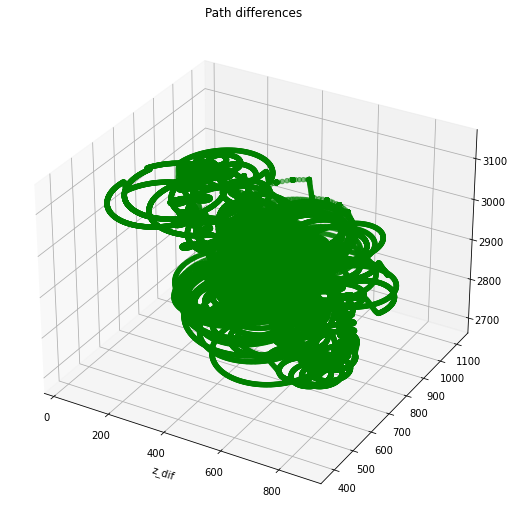

In [42]:
# First, we'll plot the path.
fig = plt.figure(figsize=(30,30))
ax = fig.add_subplot(131, projection='3d')
ax.scatter(merged_df['x_pth'], merged_df['y_pth'], merged_df['z_pth'], c="red")
ax.set_title("Original path")
ax.set_xlabel("x_pth")
ax.set_ylabel("y_pth")
ax.set_zlabel("z_pth")

# Then, we'll plot the tracked path
fig = plt.figure(figsize=(30,30))
ax = fig.add_subplot(132, projection='3d')
ax.scatter(merged_df['x_trk'], merged_df['y_trk'], merged_df['z_trk'], c="blue")
ax.set_title("Robot's actual path")
ax.set_xlabel("x_trk")
ax.set_ylabel("y_trk")
ax.set_zlabel("z_trk")

# Finally, let's plot the difference between the paths
fig = plt.figure(figsize=(30,30))
ax = fig.add_subplot(133, projection='3d')
ax.scatter(merged_df['x_dif'], merged_df['y_dif'], merged_df['z_dif'], c="green")
ax.set_title("Path differences")
ax.set_xlabel("x_dif")
ax.set_ylabel("y_dif")
ax.set_zlabel("z_dif")

plt.show()

This is interesting. I should have seen this before. It seems that in fact there may be a linear transformation from the input coordinates to the output. Under the assumption that there exists a linear transformation from the input to the output, I need only find the 3 eigenvalues for that transformation.

## Simple Linear Regression

We can now formulate a simple linear regression problem to find eigenvalues of the transformation from the input coordinates to the actual, tracked coordinates. 

In [52]:
merged_df.columns

Index(['index', 'x_pth', 'y_pth', 'z_pth', 'x_trk', 'y_trk', 'z_trk', 'x_dif',
       'y_dif', 'z_dif'],
      dtype='object')

In [53]:
# First, get the path and tracker coordinate matrices as numpy arrays
path_np = merged_df.drop(columns=['index', 'x_trk', 'y_trk', 'z_trk', 'x_dif', 'y_dif', 'z_dif'])
tracker_np = merged_df.drop(columns=['index', 'x_pth', 'y_pth', 'z_pth', 'x_dif', 'y_dif', 'z_dif'])

In [54]:
# Pad the coordinate data with ones so the transformation can do translations as well
n = path_np.shape[0]

def pad_with_ones(x):
    return np.hstack([x, np.ones((x.shape[0], 1))])

def unpad_with_ones(x):
    return x[:,:-1]

path_np_padded = pad_with_ones(path_np)
tracker_np_padded = pad_with_ones(tracker_np)

In [61]:
# Create function for finding transformation between two matrices

def find_transformation_matrix(matrix_a: np.ndarray, matrix_b: np.ndarray) -> np.ndarray:
    '''
    Given two matrices, finds and returns the transformation matrix mapping points in matrix_a
    to points in matrix_b using a least squares regression
    '''
    transformation_matrix, res, rank, s = np.linalg.lstsq(matrix_a, matrix_b)
    
    return transformation_matrix

def transform(matrix_a, transformation_matrix):
    return unpad_with_ones(np.dot(matrix_a, transformation_matrix))

print("Target: ")
print(tracker_np)
print("Calculated transformation matrix: ")
transformation_matrix = find_transformation_matrix(path_np_padded, tracker_np_padded)
print(transformation_matrix)
print("Result: ")
result_matrix = transform(path_np_padded, transformation_matrix)
print(result_matrix)


Target: 
            x_trk      y_trk        z_trk
0      -36.507133 -40.170982 -2915.784424
1      -36.543438 -40.260765 -2915.713623
2      -36.645119 -40.364326 -2915.732910
3      -36.709301 -40.413754 -2915.772949
4      -36.720108 -40.421989 -2915.788086
...           ...        ...          ...
142833 -56.302040 -35.329880 -2920.949707
142834 -56.498367 -35.344200 -2920.800537
142835 -56.712234 -35.356621 -2920.651855
142836 -56.927929 -35.364376 -2920.507080
142837 -57.196190 -35.366920 -2920.356445

[142838 rows x 3 columns]
Calculated transformation matrix: 
[[-7.78964145e-03 -3.88247401e-03  2.01441950e-02  3.55347644e-15]
 [-1.75562010e-03 -6.03741921e-03  2.44237691e-02 -2.27400564e-15]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-3.14703507e+01 -3.45347751e+01 -2.94206917e+03  1.00000000e+00]]
Result: 
[[  -37.58243568   -41.76487107 -2910.14889708]
 [  -37.58243568   -41.76487107 -2910.14889708]
 [  -37.58243568   -41.76487107 -2910.14889708]
 ..

/var/folders/92/4cd7hzf56xz746ncf8dswk7m0000gn/T/ipykernel_15789/3948861473.py:8: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  transformation_matrix, res, rank, s = np.linalg.lstsq(matrix_a, matrix_b)


In [66]:
# Convert the new transformed path_np back into a DataFrame
transformed_path_df = pd.DataFrame(result_matrix, columns=['transformed_x_pth', 'transformed_y_pth', 'transformed_z_pth'])
transformed_path_df.head()

,transformed_x_pth,transformed_y_pth,transformed_z_pth
0,-37.582436,-41.764871,-2910.148897
1,-37.582436,-41.764871,-2910.148897
2,-37.582436,-41.764871,-2910.148897
3,-37.582436,-41.764871,-2910.148897
4,-37.582436,-41.764871,-2910.148897


In [67]:
# Add the new transformed path to the merged_df
new_merged_df = merged_df.join(transformed_path_df, how='left')
new_merged_df.head()

,index,x_pth,y_pth,z_pth,x_trk,y_trk,z_trk,x_dif,y_dif,z_dif,transformed_x_pth,transformed_y_pth,transformed_z_pth
0,3180,601.989607,810.426914,0.0,-36.507133,-40.170982,-2915.784424,638.496741,850.597896,2915.784424,-37.582436,-41.764871,-2910.148897
1,3181,601.989607,810.426914,0.0,-36.543438,-40.260765,-2915.713623,638.533045,850.687679,2915.713623,-37.582436,-41.764871,-2910.148897
2,3182,601.989607,810.426914,0.0,-36.645119,-40.364326,-2915.732910,638.634726,850.791240,2915.732910,-37.582436,-41.764871,-2910.148897
3,3183,601.989607,810.426914,0.0,-36.709301,-40.413754,-2915.772949,638.698908,850.840667,2915.772949,-37.582436,-41.764871,-2910.148897
4,3184,601.989607,810.426914,0.0,-36.720108,-40.421989,-2915.788086,638.709715,850.848903,2915.788086,-37.582436,-41.764871,-2910.148897


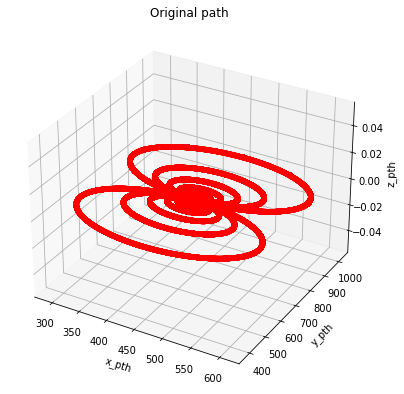

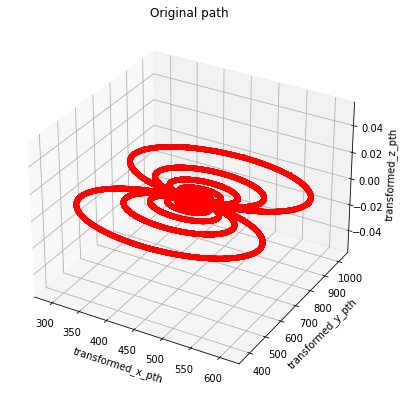

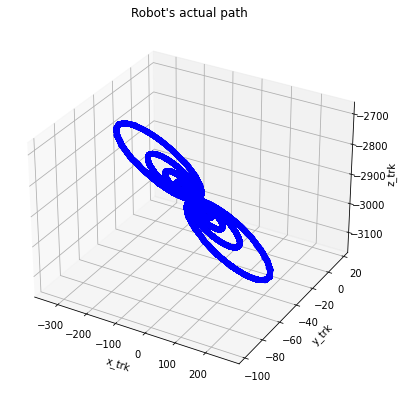

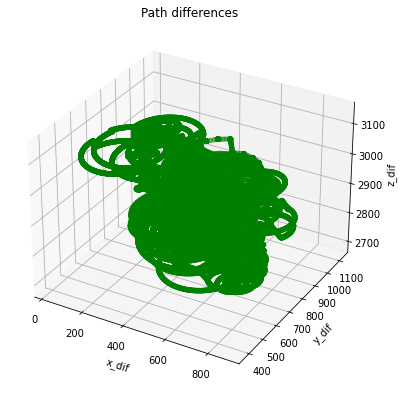

In [68]:
# Now, visualize the new transformed data in comparison to the other coordinate sets
# First, we'll plot the original path.
fig = plt.figure(figsize=(30,30))
ax = fig.add_subplot(141, projection='3d')
ax.scatter(new_merged_df['x_pth'], new_merged_df['y_pth'], new_merged_df['z_pth'], c="red")
ax.set_title("Original path")
ax.set_xlabel("x_pth")
ax.set_ylabel("y_pth")
ax.set_zlabel("z_pth")

# Then, we'll plot the transformed original path.
fig = plt.figure(figsize=(30,30))
ax = fig.add_subplot(142, projection='3d')
ax.scatter(new_merged_df['transformed_x_pth'], new_merged_df['transformed_y_pth'], new_merged_df['transformed_z_pth'], c="red")
ax.set_title("Transformed original path")
ax.set_xlabel("transformed_x_pth")
ax.set_ylabel("transformed_y_pth")
ax.set_zlabel("transformed_z_pth")

# Then, we'll plot the tracked path
fig = plt.figure(figsize=(30,30))
ax = fig.add_subplot(143, projection='3d')
ax.scatter(new_merged_df['x_trk'], new_merged_df['y_trk'], new_merged_df['z_trk'], c="blue")
ax.set_title("Robot's actual path")
ax.set_xlabel("x_trk")
ax.set_ylabel("y_trk")
ax.set_zlabel("z_trk")

# Finally, let's plot the difference between the paths
fig = plt.figure(figsize=(30,30))
ax = fig.add_subplot(144, projection='3d')
ax.scatter(new_merged_df['x_dif'], new_merged_df['y_dif'], new_merged_df['z_dif'], c="green")
ax.set_title("Path differences")
ax.set_xlabel("x_dif")
ax.set_ylabel("y_dif")
ax.set_zlabel("z_dif")

plt.show()